# “Hello, world!”

Import comcloak:

In [1]:
import os
gpu_num = 0 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import os
print("Current directory:", os.getcwd())
try:
    import comcloak as sn
except ImportError as e:
    import sys
    sys.path.append("../")
    import comcloak as sn
import comcloak
import torch

# # Import Sionna
# try:
#     import sys
#     sys.path.insert(0, 'D:\sionna-main')
#     import sionna
# except ImportError as e:
#     # Install Sionna if package is not already installed
#     import os
#     # os.system("pip install sionna")
#     import comcloak
# IPython "magic function" for inline plots
%matplotlib inline
import matplotlib.pyplot as plt

Current directory: /home/wzs/project/sionna-main/examples


Let us first create a [BinarySource](https://nvlabs.github.io/comcloak/api/utils.html?highlight=binarysource#binarysource) to generate a random batch of bit vectors that we can map to constellation symbols:

In [2]:
batch_size = 1000 # Number of symbols we want to generate
num_bits_per_symbol = 4 # 16-QAM has four bits per symbol
binary_source = comcloak.utils.BinarySource()
b = binary_source([batch_size, num_bits_per_symbol])
b

tensor([[1., 0., 1., 0.],
        [0., 1., 1., 1.],
        [1., 0., 1., 0.],
        ...,
        [0., 1., 1., 0.],
        [0., 1., 1., 0.],
        [0., 0., 0., 0.]])

Next, let us create a [Constellation](https://nvlabs.github.io/sionna/api/mapping.html#sionna.mapping.Constellation) and visualize it:

/home/wzs/project/sionna-main/examples/../comcloak/mapping.py:362: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._points = torch.tensor(points, dtype=get_real_dtype(self._dtype))


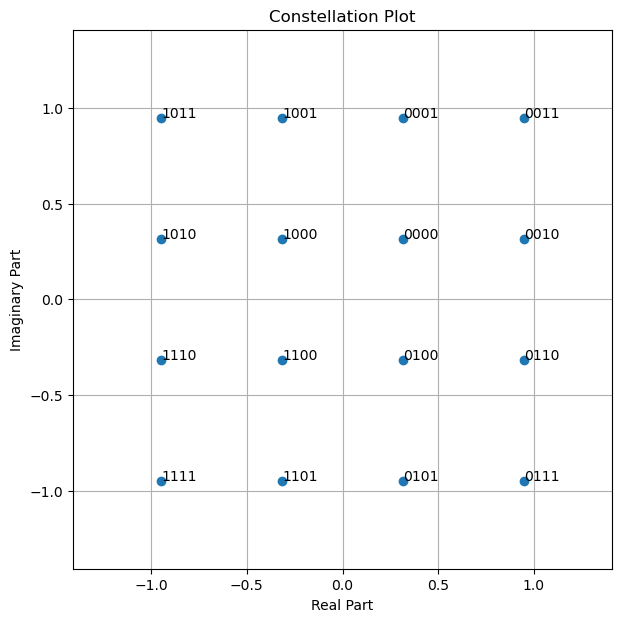

In [3]:
constellation = comcloak.mapping.Constellation("qam", num_bits_per_symbol)
constellation.show();

We now need a [Mapper](https://nvlabs.github.io/sionna/api/mapping.html#mapper) that maps each row of b to the constellation symbols according to the bit labeling shown above.

In [4]:
mapper = comcloak.mapping.Mapper(constellation=constellation)
x = mapper(b)
x[:10]

/home/wzs/project/sionna-main/examples/../comcloak/supplement.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data)
/home/wzs/project/sionna-main/examples/../comcloak/supplement.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  indices = torch.tensor(indices)


tensor([[-0.9487+0.3162j],
        [ 0.9487-0.9487j],
        [-0.9487+0.3162j],
        [-0.3162-0.3162j],
        [ 0.9487-0.9487j],
        [-0.9487+0.9487j],
        [-0.3162-0.3162j],
        [ 0.3162+0.9487j],
        [ 0.3162-0.3162j],
        [ 0.9487-0.3162j]])

Let us now make things a bit more interesting a send our symbols over and [AWGN channel](https://nvlabs.github.io/sionna/api/channel.html#sionna.channel.AWGN):

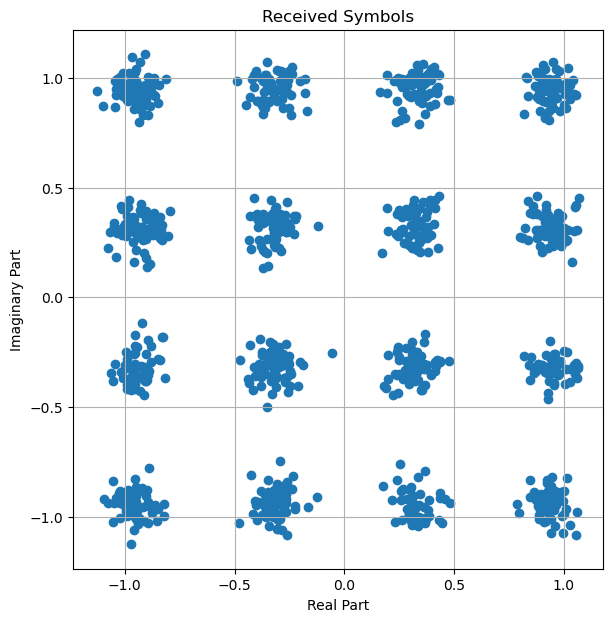

In [5]:
awgn = comcloak.channel.AWGN()
ebno_db = 15 # Desired Eb/No in dB
no = comcloak.utils.ebnodb2no(ebno_db, num_bits_per_symbol, coderate=1)
y = awgn([x, no])

# Visualize the received signal
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.scatter(np.real(y), np.imag(y));
ax.set_aspect("equal", adjustable="box")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.grid(True, which="both", axis="both")
plt.title("Received Symbols");